## Análise do Campeonato Brasileiro Série A, de 2007 até 2023

Esse é um projeto para fins de curiosidade e estudo de análise de dados, com o objetivo de verificar os maiores vencedores da competição dos últimos anos.

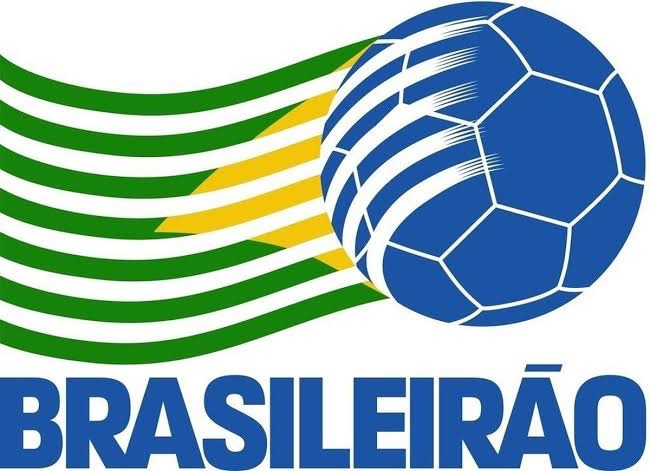

# Conjunto de dados
*   [Kaggle: Brazilian Soccer - Brasileirão](https://www.kaggle.com/datasets/gustavomartino/brasileirao/data)




Importando as bibliotecas que serão utilizadas nos passos seguintes para realizar análise descritiva e visualiações com os dados escolhidos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
import plotly as px
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.figure_factory as ff

Leitura dos dados - Carregando os dados no ambiente e fazendo a leitura criando um dataframe.

In [ ]:
data = pd.read_csv("/content/CampBras.csv")

Descrição dos dados - Depois de ler os dados, vamos verificar se eles foram lidos corretamente e apresentar os tipos de cada variável.

In [ ]:
data.head()

,round,day,month,year,season,hometeam,goalsht,goalsvt,visitingteam
0,1,12,5,2007,2007,Figueirense,3.0,6.0,Athletico-PR
1,1,12,5,2007,2007,Fluminense,2.0,2.0,Cruzeiro
2,1,12,5,2007,2007,São Paulo,2.0,0.0,Goiás
3,1,13,5,2007,2007,Paraná,3.0,0.0,Grêmio
4,1,13,5,2007,2007,Flamengo,2.0,4.0,Palmeiras


In [ ]:
data.info() #tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   round         6460 non-null   int64  
 1   day           6460 non-null   int64  
 2   month         6460 non-null   int64  
 3   year          6460 non-null   int64  
 4   season        6460 non-null   int64  
 5   hometeam      6460 non-null   object 
 6   goalsht       6459 non-null   float64
 7   goalsvt       6459 non-null   float64
 8   visitingteam  6460 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 454.3+ KB


Apenas os nomes dos times são object (texto) - hometeam e visitingteam. As outras são todas numéricas.



## Verificando se há dados faltantes e os removendo

In [ ]:
data.isnull().sum()

round           0
day             0
month           0
year            0
season          0
hometeam        0
goalsht         1
goalsvt         1
visitingteam    0
dtype: int64

Podemos observar que existe um dado faltante em goalsht e um dado faltante em goalsvt. Essas colunas seriam gols marcados pelo time da casa e gols marcados pelo time de fora, respectivamente.

Acontece que este resultado não está disponível pois seria um jogo da Chapecoense, que sofreu um acidente em 2016.

In [ ]:
faltantes = data['goalsht'].isnull()
data[faltantes]

,round,day,month,year,season,hometeam,goalsht,goalsvt,visitingteam
3799,38,11,12,2016,2016,Chapecoense,NaN,NaN,Atlético-MG


Aqui podemos confirmar que os dados faltantes pertencem ao jogo da Chapecoense X Atlético-MG em 11/12/2016. A partida na época foi cancelada por conta do acidente aéreo envolvendo a equipe da Chape.

Pesquisando no google, a partida consta com status de 'cancelado'. Sendo assim, para esta análise, irei retirar o registro 3799 do nosso dataset.

In [ ]:
data = data.dropna(subset=['goalsht'])

In [ ]:
data.isnull().sum()

round           0
day             0
month           0
year            0
season          0
hometeam        0
goalsht         0
goalsvt         0
visitingteam    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6459 entries, 0 to 6459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   round         6459 non-null   int64  
 1   day           6459 non-null   int64  
 2   month         6459 non-null   int64  
 3   year          6459 non-null   int64  
 4   season        6459 non-null   int64  
 5   hometeam      6459 non-null   object 
 6   goalsht       6459 non-null   float64
 7   goalsvt       6459 non-null   float64
 8   visitingteam  6459 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 504.6+ KB


Confirmando que o registro 3799, que continha a partida entre Chapecoense X Atlético-MG em 11/12/2016, foi retirado.

## Criando uma nova coluna

In [ ]:
def determinar_resultado(row):
    if row['goalsht'] > row['goalsvt']:
        return '1'  # Vitória do time da casa
    elif row['goalsht'] < row['goalsvt']:
        return '2'  # Vitória do time visitante
    else:
        return 'X'  # Empate

data['results'] = data.apply(determinar_resultado, axis=1)

In [ ]:
data.head()

,round,day,month,year,season,hometeam,goalsht,goalsvt,visitingteam,results
0,1,12,5,2007,2007,Figueirense,3.0,6.0,Athletico-PR,2
1,1,12,5,2007,2007,Fluminense,2.0,2.0,Cruzeiro,X
2,1,12,5,2007,2007,São Paulo,2.0,0.0,Goiás,1
3,1,13,5,2007,2007,Paraná,3.0,0.0,Grêmio,1
4,1,13,5,2007,2007,Flamengo,2.0,4.0,Palmeiras,2


Criação da coluna 'results' onde mostra um resumo de como foi a partida. Sendo 1 vitória do time de casa, X empate e 2 vitória do time visitante.

## Verificando os valores médios, mínimos e máximos das variáveis numéricas

In [ ]:
data.describe().round(2)

,round,day,month,year,season,goalsht,goalsvt
count,6459.00,6459.00,6459.00,6459.00,6459.0,6459.00,6459.00
mean,19.50,15.72,8.19,2015.02,2015.0,1.48,0.99
std,10.97,8.87,2.24,4.92,4.9,1.20,1.00
min,1.00,1.00,1.00,2007.00,2007.0,0.00,0.00
25%,10.00,8.00,7.00,2011.00,2011.0,1.00,0.00
50%,19.00,16.00,8.00,2015.00,2015.0,1.00,1.00
75%,29.00,23.00,10.00,2019.00,2019.0,2.00,2.00
max,38.00,31.00,12.00,2023.00,2023.0,7.00,7.00


Podemos confirmar que os dados inciam no campeonato de 2007 (min) e vai até o ano de 2023 (max). Percebemos também que a mediana de gols marcados pelos times da casa é de 1.48 gols e 0.99 gols para os times visitantes.

Além de que o máximo de gols registrados neste período foi de 7, tanto pra gol marcado por um time da casa e um time de fora.

## Analisando a variável 'goalsht' e apresentando seus valores únicos e sua distribuição

In [ ]:
data['goalsht'].unique()

array([3., 2., 0., 1., 4., 5., 6., 7.])

In [ ]:
data['goalsht'].value_counts()

goalsht
1.0    2230
2.0    1618
0.0    1413
3.0     794
4.0     301
5.0      84
6.0      18
7.0       1
Name: count, dtype: int64

A maioria das partidas que foram finalizadas, em relação a quantidade de gols do time da casa, foi de apenas 1 gol marcado, com 2230 registros.

Em seguida, 2 gols marcados, com 1618 registros.

E em terceiro lugar, 0 gols marcados pelo time da casa, com 1413 registros.  

### Para essa mesma variável numérica, apresentando duas formas de visualizarmos essa distribuição

In [ ]:
fig = px.histogram(data, x='goalsht')
fig.show()

In [ ]:
fig = px.histogram(data, x='goalsht', color='hometeam', nbins=20)
fig.show()

Podemos confirmar que a maioria das partidas foram finalizadas com 1 gol pro time da casa.

É possível ver também que a equipe que mais finalizou partidas marcando apenas 1 gol dentro de casa foi o Fluminense, com 120 partidas registradas.

### Histograma da variável ' goalsvt'

In [ ]:
fig = px.histogram(data, x='goalsvt')
fig.show()

In [ ]:
fig = px.histogram(data, x='goalsvt', color='visitingteam', nbins=20)
fig.show()

conseguimos verificar que a maioria das partidas foram finalizadas com 0 gols pro time de fora(visitante), com 2416 registros.

Logo em seguida, partidas finalizadas com 1 gol pro time visitante, com 2342 registros.

## Inidicando os valores únicos da variável 'hometeam' (categórica) e sua distribuição

In [ ]:
data['hometeam'].unique()

array(['Figueirense', 'Fluminense', 'São Paulo', 'Paraná', 'Flamengo',
       'Internacional', 'Atlético-MG', 'América-RN', 'Corinthians',
       'Sport', 'Santos', 'Athletico-PR', 'Juventude', 'Goiás',
       'Botafogo', 'Cruzeiro', 'Palmeiras', 'Grêmio', 'Náutico', 'Vasco',
       'Vitória', 'Ipatinga', 'Coritiba', 'Portuguesa', 'Avaí',
       'Santo André', 'Barueri', 'Atlético-GO', 'Ceará', 'Guarani',
       'Grêmio Prudente', 'América-MG', 'Bahia', 'Ponte Preta',
       'Criciúma', 'Chapecoense', 'Joinville', 'Santa Cruz', 'CSA',
       'Fortaleza', 'Bragantino', 'Cuiabá'], dtype=object)

In [ ]:
data['hometeam'].value_counts()

hometeam
Fluminense         323
São Paulo          323
Atlético-MG        323
Santos             323
Flamengo           322
Grêmio             304
Internacional      304
Palmeiras          304
Corinthians        304
Athletico-PR       304
Botafogo           286
Cruzeiro           266
Vasco              228
Coritiba           228
Sport              209
Goiás              209
Bahia              190
Vitória            152
Avaí               133
Figueirense        133
Ceará              133
Atlético-GO        133
Chapecoense        132
América-MG         114
Náutico             95
Ponte Preta         95
Fortaleza           95
Bragantino          76
Cuiabá              57
Portuguesa          57
Juventude           57
Criciúma            38
Paraná              38
Guarani             19
Grêmio Prudente     19
Barueri             19
Santo André         19
Joinville           19
Santa Cruz          19
CSA                 19
América-RN          19
Ipatinga            19
Name: count, dtype: int64

Dos times que jogaram em casa de 2007-2023, temos Fluminense,  São Paulo, Atlético-MG e Santos com mais jogos, sendo 323 registros. Em seguida o Flamengo com 322 registros.

### Verificando quanto cada categoria dessa variável representa em percentual

In [ ]:
data['hometeam'].value_counts(normalize=True)

hometeam
Fluminense         0.050008
São Paulo          0.050008
Atlético-MG        0.050008
Santos             0.050008
Flamengo           0.049853
Grêmio             0.047066
Internacional      0.047066
Palmeiras          0.047066
Corinthians        0.047066
Athletico-PR       0.047066
Botafogo           0.044279
Cruzeiro           0.041183
Vasco              0.035300
Coritiba           0.035300
Sport              0.032358
Goiás              0.032358
Bahia              0.029416
Vitória            0.023533
Avaí               0.020591
Figueirense        0.020591
Ceará              0.020591
Atlético-GO        0.020591
Chapecoense        0.020437
América-MG         0.017650
Náutico            0.014708
Ponte Preta        0.014708
Fortaleza          0.014708
Bragantino         0.011767
Cuiabá             0.008825
Portuguesa         0.008825
Juventude          0.008825
Criciúma           0.005883
Paraná             0.005883
Guarani            0.002942
Grêmio Prudente    0.002942
Barueri    

In [ ]:
data['hometeam'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

hometeam
Fluminense          5.0%
São Paulo           5.0%
Atlético-MG         5.0%
Santos              5.0%
Flamengo           4.99%
Grêmio             4.71%
Internacional      4.71%
Palmeiras          4.71%
Corinthians        4.71%
Athletico-PR       4.71%
Botafogo           4.43%
Cruzeiro           4.12%
Vasco              3.53%
Coritiba           3.53%
Sport              3.24%
Goiás              3.24%
Bahia              2.94%
Vitória            2.35%
Avaí               2.06%
Figueirense        2.06%
Ceará              2.06%
Atlético-GO        2.06%
Chapecoense        2.04%
América-MG         1.76%
Náutico            1.47%
Ponte Preta        1.47%
Fortaleza          1.47%
Bragantino         1.18%
Cuiabá             0.88%
Portuguesa         0.88%
Juventude          0.88%
Criciúma           0.59%
Paraná             0.59%
Guarani            0.29%
Grêmio Prudente    0.29%
Barueri            0.29%
Santo André        0.29%
Joinville          0.29%
Santa Cruz         0.29%
CSA             

Os times com maior porcentagem jogando em casa são Fluminense, São Paulo, Atlético-MG e Santos, com 5.0% e o Flamengo com 4.99%.

E os com menor são Guarani, Grêmio Prudente, Barueri, Santo André, Joinville, Santa Cruz, CSA, América-RN e Ipatinga com 0.29% dos registros.


### Para essa mesma variável (hometeam), segue duas formas de visualizarmos essa distribuição

In [ ]:
fig = px.histogram(data, x="hometeam")
fig.show()

In [ ]:
hometeam_counts = data['hometeam'].value_counts().reset_index()
hometeam_counts.columns = ['hometeam', 'count']

fig = px.pie(hometeam_counts, names='hometeam', values='count', title='Distribuição das Equipes da Casa')
fig.show()

A gente percebe que alguns times possuem mais jogos em casa pois permaneceram na Serie A por mais tempo que outros, durante o período do conjunto de dados (2007-2023).

Basicamente, 60% dos campeonatos sempre foram compostos pelos mesmos players. Entre eles, Fluminense, São Paulo, Atlético-MG, Santos, Flamengo, Grêmio, Internacional, Palmeiras, Corinthians, Athletico-PR, Botafogo e Cruzeiro.

# Conversão de variáveis

### Convertendo a variável 'month' (numérica) em 'quarter_month' (categórica)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6459 entries, 0 to 6459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   round         6459 non-null   int64  
 1   day           6459 non-null   int64  
 2   month         6459 non-null   int64  
 3   year          6459 non-null   int64  
 4   season        6459 non-null   int64  
 5   hometeam      6459 non-null   object 
 6   goalsht       6459 non-null   float64
 7   goalsvt       6459 non-null   float64
 8   visitingteam  6459 non-null   object 
 9   results       6459 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 555.1+ KB


In [ ]:
bins = [0, 3, 6, 9, 12] #trimestre (quarter)
data['quarter_month'] = pd.cut(data['month'], bins=bins)
data['quarter_month']

0        (3, 6]
1        (3, 6]
2        (3, 6]
3        (3, 6]
4        (3, 6]
         ...   
6455    (9, 12]
6456    (9, 12]
6457    (9, 12]
6458    (9, 12]
6459    (9, 12]
Name: quarter_month, Length: 6459, dtype: category
Categories (4, interval[int64, right]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

In [ ]:
labels = [1,2,3,4] # a quatidade precisa ser 1 unidade menor que número de 'bins'
data['quarter_month'] = pd.cut(data['month'], bins=bins, labels=labels)
data['quarter_month']

0       2
1       2
2       2
3       2
4       2
       ..
6455    4
6456    4
6457    4
6458    4
6459    4
Name: quarter_month, Length: 6459, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
data[['quarter_month', 'month']].sample(10)

,quarter_month,month
580,3,8
6296,3,9
1842,4,11
6331,4,10
2130,3,9
6225,3,7
6140,2,5
5982,4,10
118,3,7
5623,4,11


### Verificando a distribuição dessa nova variável





In [ ]:
data['quarter_month'].value_counts()

quarter_month
3    2798
4    2116
2    1432
1     113
Name: count, dtype: int64

### Convertendo a variável 'results' (categórica) em 'results_1','results_2' e 'results_x' (numérica)

Estaremos aplicando a técnica de one-hot encoding. Além de adicionar essas novas colunas ao dataset.

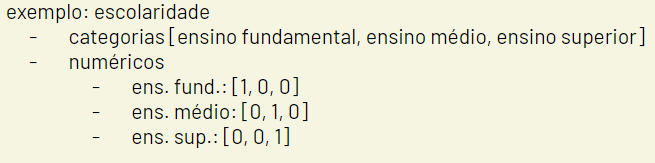


In [ ]:
data.head()

,round,day,month,year,season,hometeam,goalsht,goalsvt,visitingteam,results,quarter_month
0,1,12,5,2007,2007,Figueirense,3.0,6.0,Athletico-PR,2,2
1,1,12,5,2007,2007,Fluminense,2.0,2.0,Cruzeiro,X,2
2,1,12,5,2007,2007,São Paulo,2.0,0.0,Goiás,1,2
3,1,13,5,2007,2007,Paraná,3.0,0.0,Grêmio,1,2
4,1,13,5,2007,2007,Flamengo,2.0,4.0,Palmeiras,2,2


In [ ]:
one_hot = pd.get_dummies(data['results'], prefix='results')
one_hot

,results_1,results_2,results_X
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
6455,False,False,True
6456,True,False,False
6457,False,True,False
6458,True,False,False


In [ ]:
one_hot = pd.get_dummies(data['results'], prefix='results', dtype=int)
one_hot

,results_1,results_2,results_X
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
6455,0,0,1
6456,1,0,0
6457,0,1,0
6458,1,0,0


In [ ]:
data = data.join(one_hot)

In [ ]:
data.head()

,round,day,month,year,season,hometeam,goalsht,goalsvt,visitingteam,results,quarter_month,results_1,results_2,results_X
0,1,12,5,2007,2007,Figueirense,3.0,6.0,Athletico-PR,2,2,0,1,0
1,1,12,5,2007,2007,Fluminense,2.0,2.0,Cruzeiro,X,2,0,0,1
2,1,12,5,2007,2007,São Paulo,2.0,0.0,Goiás,1,2,1,0,0
3,1,13,5,2007,2007,Paraná,3.0,0.0,Grêmio,1,2,1,0,0
4,1,13,5,2007,2007,Flamengo,2.0,4.0,Palmeiras,2,2,0,1,0


# Agregação de dados

## Relacionando variáveis e fazendo agrupamentos

Verificando a quantidade de gols marcados pelos times da casa.

In [ ]:
data['goalsht'].value_counts()

goalsht
1.0    2230
2.0    1618
0.0    1413
3.0     794
4.0     301
5.0      84
6.0      18
7.0       1
Name: count, dtype: int64

In [ ]:
grouped_data = data.groupby('hometeam')['goalsht'].sum().sort_values(ascending = False)
print(grouped_data)

hometeam
Atlético-MG        569.0
Flamengo           549.0
Santos             543.0
Grêmio             520.0
Palmeiras          518.0
São Paulo          510.0
Internacional      495.0
Fluminense         490.0
Athletico-PR       462.0
Corinthians        451.0
Botafogo           424.0
Cruzeiro           417.0
Vasco              323.0
Coritiba           310.0
Goiás              296.0
Sport              291.0
Bahia              244.0
Vitória            232.0
Figueirense        174.0
Avaí               172.0
Ceará              160.0
Atlético-GO        158.0
Chapecoense        149.0
América-MG         133.0
Náutico            131.0
Fortaleza          124.0
Ponte Preta        122.0
Bragantino         119.0
Portuguesa          90.0
Juventude           62.0
Cuiabá              58.0
Criciúma            45.0
Paraná              37.0
Barueri             35.0
Santo André         29.0
Ipatinga            28.0
Santa Cruz          27.0
Grêmio Prudente     25.0
Joinville           19.0
Guarani         

Time que mais marcou gols em casa foi o Atlético-MG, com 569 gols marcados.

# Medidas de centralidade

## Calculando a média, mediana e moda da varável 'goalsht'

In [ ]:
data.describe().round(2)

,round,day,month,year,season,goalsht,goalsvt,results_1,results_2,results_X
count,6459.00,6459.00,6459.00,6459.00,6459.0,6459.00,6459.00,6459.00,6459.00,6459.00
mean,19.50,15.72,8.19,2015.02,2015.0,1.48,0.99,0.49,0.24,0.27
std,10.97,8.87,2.24,4.92,4.9,1.20,1.00,0.50,0.43,0.44
min,1.00,1.00,1.00,2007.00,2007.0,0.00,0.00,0.00,0.00,0.00
25%,10.00,8.00,7.00,2011.00,2011.0,1.00,0.00,0.00,0.00,0.00
50%,19.00,16.00,8.00,2015.00,2015.0,1.00,1.00,0.00,0.00,0.00
75%,29.00,23.00,10.00,2019.00,2019.0,2.00,2.00,1.00,0.00,1.00
max,38.00,31.00,12.00,2023.00,2023.0,7.00,7.00,1.00,1.00,1.00


In [ ]:
data['goalsht'].mean().round(2)

1.48

In [ ]:
data['goalsht'].median().round(2)

1.0

In [ ]:
data['goalsht'].mode()

0    1.0
Name: goalsht, dtype: float64

Média de 1.48 gols marcados em casa.
Mediana de 1.0 gol marcado em casa.
Moda de 1.0 gol marcado em casa.

## Gerando o boxplot e um violin referente a 'goalsht'

<Axes: >

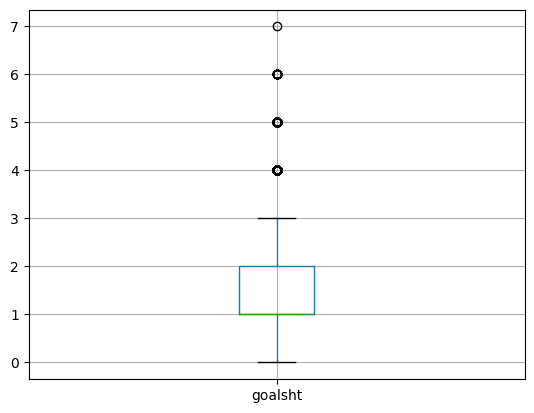

In [ ]:
data.boxplot(column='goalsht')

In [ ]:
fig = px.violin(data, y="goalsht")
fig.show()

Percebemos que o máximo de gols marcados em casa foi 7, a mediana realmente está na casa do 1 gol e quantidade de gols acima de 3 foram considerados outliers.

 Conseguimos ver que a largura do violino pode variar, indicando densidades diferentes de dados em diferentes partes da variável (gols - números exatos, 0, 1, 2...).

## Calculando a moda da variável categórica 'quarter_month'  (trimestre)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6459 entries, 0 to 6459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   round          6459 non-null   int64   
 1   day            6459 non-null   int64   
 2   month          6459 non-null   int64   
 3   year           6459 non-null   int64   
 4   season         6459 non-null   int64   
 5   hometeam       6459 non-null   object  
 6   goalsht        6459 non-null   float64 
 7   goalsvt        6459 non-null   float64 
 8   visitingteam   6459 non-null   object  
 9   results        6459 non-null   object  
 10  quarter_month  6459 non-null   category
 11  results_1      6459 non-null   int64   
 12  results_2      6459 non-null   int64   
 13  results_X      6459 non-null   int64   
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 971.0+ KB


In [ ]:
data['quarter_month'].mode()

0    3
Name: quarter_month, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

A moda da variável quarter_month (trimestre) foi 3, indicando que seria o trimestre com mais jogos registrados. Seriam eles: meses 7, 8 e 9.

# Medidas de dispersão

## Calculando a amplitude, a variância e o desvio padrão da variável numérica 'goalsht'

In [ ]:
data['goalsht'].max() - data['goalsht'].min()

7.0

In [ ]:
data['goalsht'].var().round(2)

1.43

In [ ]:
data['goalsht'].std().round(2)

1.2


Como os gols marcados em casa variam de 0 à 7 e apresentam registros de ambos valores, a amplitude é igual à 7.

As observações de gols marcados em casa variam numa taxa aproximada de 1.43 pontos ao quadrado.

As observações de gols marcados em casa apresentam um desvio padrão aproximado de 1.2 pontos.



# Analisando se as variáveis apresentam alguma relação

## Relacionando as variáveis numéricas 'month' e 'goalsht' utilizando o gráfico de dispersão

In [ ]:
grouped_data1 = data.groupby('month')['goalsht'].sum()
print(grouped_data1)

month
1       92.0
2       74.0
4      185.0
5      864.0
6     1079.0
7     1291.0
8     1402.0
9     1447.0
10    1492.0
11    1280.0
12     381.0
Name: goalsht, dtype: float64


In [ ]:
fig = px.scatter(grouped_data1)
fig.show()


Conseguimos perceber que a partir do segundo semestre a quantidade de gols marcados em casa aumenta.

## Apresentando a correlação de todas as variáveis numéricas tanto em formato tabular quanto com o auxílio de uma ferramenta gráfica


In [ ]:
data[['month', 'goalsht']].corr(numeric_only=True).round(2)

,month,goalsht
month,1.00,0.01
goalsht,0.01,1.00


In [ ]:
correlacao = data.corr(numeric_only=True).round(2)
correlacao

,round,day,month,year,season,goalsht,goalsvt,results_1,results_2,results_X
round,1.00,-0.03,0.78,0.00,-0.00,0.01,-0.01,0.02,0.00,-0.02
day,-0.03,1.00,-0.16,-0.02,-0.02,0.00,0.02,-0.01,-0.00,0.01
month,0.78,-0.16,1.00,-0.06,-0.05,0.01,-0.01,0.01,0.01,-0.02
year,0.00,-0.02,-0.06,1.00,1.00,-0.09,-0.03,-0.03,0.03,0.01
season,-0.00,-0.02,-0.05,1.00,1.00,-0.09,-0.03,-0.03,0.03,0.01
goalsht,0.01,0.00,0.01,-0.09,-0.09,1.00,0.04,0.62,-0.44,-0.28
goalsvt,-0.01,0.02,-0.01,-0.03,-0.03,0.04,1.00,-0.48,0.59,-0.03
results_1,0.02,-0.01,0.01,-0.03,-0.03,0.62,-0.48,1.00,-0.55,-0.60
results_2,0.00,-0.00,0.01,0.03,0.03,-0.44,0.59,-0.55,1.00,-0.34
results_X,-0.02,0.01,-0.02,0.01,0.01,-0.28,-0.03,-0.60,-0.34,1.00


<Axes: >

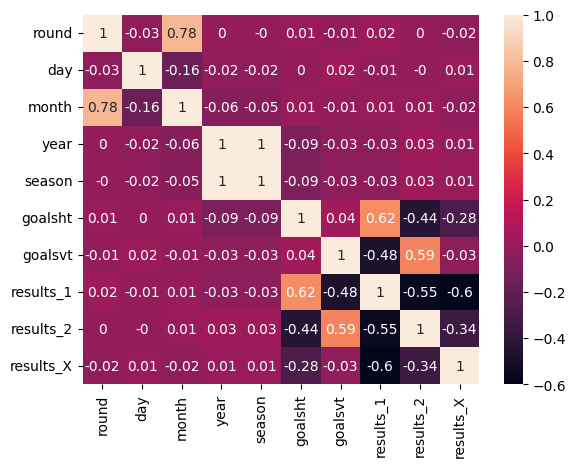

In [ ]:
sb.heatmap(correlacao, annot=True)

A quantidade de gols marcados pelo time visitante tem uma correlação negativa forte com a variável 'results_1', que seria a vitória do time da casa. Assim como a quantidade de gols marcados pelo time da casa tem uma correlação positiva forte com a variável 'results_1', que seria a vitória do time da casa.

# Algumas perguntas que são possíveis de responder com o auxílo da análise descritiva e de visualização

## Pergunta 1: Analisando todas as seasons, quais times mais venceram jogando em casa?

In [ ]:
homewin = data.groupby('hometeam')['results_1'].sum().sort_values(ascending= False)
print(homewin)

hometeam
Atlético-MG        190
Grêmio             188
Flamengo           182
São Paulo          180
Internacional      177
Palmeiras          176
Santos             173
Athletico-PR       169
Corinthians        167
Fluminense         164
Cruzeiro           138
Botafogo           132
Coritiba           105
Vasco              100
Sport               97
Goiás               89
Bahia               77
Vitória             64
Ceará               52
Figueirense         51
Chapecoense         48
Ponte Preta         46
Fortaleza           46
América-MG          45
Avaí                44
Atlético-GO         43
Náutico             42
Bragantino          36
Portuguesa          24
Cuiabá              19
Juventude           18
Criciúma            15
Paraná              11
Barueri             10
Ipatinga             9
Santo André          8
Santa Cruz           7
Guarani              7
CSA                  6
Joinville            6
Grêmio Prudente      5
América-RN           2
Name: results_1, dtype: i

Atlético-MG foi a equipe que mais venceu em casa jogando da season 2007 até 2023, com 190 vitórias.

## Pergunta 2: Analisando todas as seasons, quais times mais venceram fora de casa?

In [ ]:
awaywin = data.groupby('visitingteam')['results_2'].sum().sort_values(ascending= False)
print(awaywin)

visitingteam
Flamengo           112
São Paulo          101
Palmeiras           99
Fluminense          97
Atlético-MG         93
Cruzeiro            88
Grêmio              86
Corinthians         85
Santos              81
Internacional       79
Botafogo            74
Athletico-PR        67
Vasco               52
Goiás               44
Bahia               38
Coritiba            35
Sport               34
Vitória             31
Atlético-GO         29
Figueirense         28
Fortaleza           26
Avaí                22
Chapecoense         22
Ceará               20
Bragantino          19
Cuiabá              15
Ponte Preta         13
América-MG          13
Náutico             12
Juventude            7
Portuguesa           7
Criciúma             5
Paraná               4
Santo André          3
CSA                  2
Grêmio Prudente      2
Barueri              2
América-RN           2
Joinville            1
Guarani              1
Santa Cruz           1
Ipatinga             0
Name: results_2, dtyp

Flamengo foi a equipe que mais venceu fora de casa jogando da season 2007 até 2023, com 112 vitórias.          

## Pergunta 3: Das ultimas seasons (2020-2023), quais times mais venceram dentro de casa?

In [ ]:
ultimasseasons = data[data['season']>=2020]

In [ ]:
ultimasseasons.season.value_counts()

season
2020    380
2021    380
2022    380
2023    380
Name: count, dtype: int64

In [ ]:
homewins = ultimasseasons.groupby('hometeam')['results_1'].sum().sort_values(ascending= False)
print(homewins)

hometeam
Atlético-MG      50
Palmeiras        47
Fluminense       47
Flamengo         45
Internacional    42
São Paulo        38
Athletico-PR     38
Bragantino       36
Corinthians      36
Fortaleza        35
Santos           32
Grêmio           32
Bahia            25
América-MG       23
Ceará            21
Botafogo         20
Cuiabá           19
Coritiba         19
Atlético-GO      18
Goiás            17
Vasco            16
Sport            13
Juventude        11
Avaí              7
Cruzeiro          4
Chapecoense       0
Name: results_1, dtype: int64


Atlético-MG foi a equipe que mais venceu dentro de casa jogando da season 2020 até 2023, com 50 vitórias.

Em seguida o Palmeiras e o Fluminense, com 47 vitórias dentro de casa.

E Flamengo com 45 vitórias dentro de casa.

## Pergunta 4: Das ultimas seasons (2020-2023), quais times mais venceram fora de casa?

In [ ]:
awaywins = ultimasseasons.groupby('visitingteam')['results_2'].sum().sort_values(ascending= False)
print(awaywins)

visitingteam
Flamengo         34
Palmeiras        31
Atlético-MG      30
Internacional    25
Fluminense       23
Fortaleza        22
Corinthians      22
Athletico-PR     20
Bragantino       19
São Paulo        18
Botafogo         18
Santos           17
Cuiabá           15
Grêmio           15
Atlético-GO      15
Goiás            12
Ceará            11
América-MG       10
Bahia            10
Coritiba          8
Sport             8
Cruzeiro          7
Vasco             6
Juventude         3
Avaí              2
Chapecoense       1
Name: results_2, dtype: int64




Flamengo foi a equipe que mais venceu fora de casa jogando da season 2020 até 2023, com 34 vitórias.

Em seguida o Palmeiras, com 31 vitórias fora de casa.

E Atlético-MG com 30 vitórias fora de casa.





##Conclusão

Através desses dados do Brasileirão e das análises que foram feitas, tratando e utilizando gráficos para uma melhor visualização, foi possível retirar alguns insights, tanto em relação aos jogos antigos(base de dados inteira 2007-2023) quanto das três ultimas seasons (2020-2023). Além de observar os times que tiveram melhores desempenhos, tanto jogando em casa, quanto jogando fora.